<a href="https://colab.research.google.com/github/ArnelMalubay/Simple-CNN-for-Fashion-MNIST/blob/master/CNN_for_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN for Fashion MNIST

## Preprocessing

Hi! I'm a beginner in machine learning, and this is a simple project in tackling the Fashion MNIST classification task using tf.keras. We begin by importing the necessary libraries for this particular task.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

We then load the dataset using keras.datasets. In this cell, we also perform most of the preprocessing needed, such as the scaling and reshaping of inputs, as well as the splitting of the data into train, test, and validation datasets.

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images_orig / 255, test_images_orig / 255
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
train_size = 90* train_images.shape[0] // 100
train_images, valid_images, train_labels, valid_labels = train_images[:train_size], train_images[train_size:], train_labels[:train_size], train_labels[train_size:]


Since this is a classification task, it is a good thing if we know what the labels in the dataset represent. This can be easily searched, as there is a lot of tutorials available that uses the Fashion MNIST dataset. For more information, check https://github.com/zalandoresearch/fashion-mnist.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

The next two cells illustrate the use of tf.data to further process our datasets. We use tf.data to batch, shuffle and prefetch, making it more manageable for our model.

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
validation = tf.data.Dataset.from_tensor_slices((valid_images,valid_labels))

In [0]:
def preprocess(data, buffer_size = 10000, batch = 100, prefetch_buffer = 1, seed = 42):
  data = data.shuffle(buffer_size, seed = seed).batch(batch)
  return data.prefetch(prefetch_buffer)

dataset = preprocess(dataset)
validation = preprocess(validation)

## Creating the Model

We simply use keras.models.Sequential to stack a series of Convolutional and Pooling layers, followed by a Dense output layer with softmax activation, allowing it to output the class probabilities for each of the classes.

In [0]:
cnn = keras.models.Sequential([
  keras.layers.Conv2D(25, 8, 1, 'same', activation='relu', input_shape = (28,28,1)),
  keras.layers.Conv2D(50, 4, 1, 'valid', activation='relu'),
  keras.layers.MaxPool2D(2),
  keras.layers.Conv2D(100, 2, 1, 'same', activation='relu'),
  keras.layers.Conv2D(80, 1, 1, 'same', activation='relu'),
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation='softmax')                             
])

We then compile and fit the model. 

In [0]:
cnn.compile(optimizer=keras.optimizers.Adam(),
            loss='sparse_categorical_crossentropy',
            metrics='accuracy')

In [0]:
cnn_hist = cnn.fit(dataset,
                   epochs=15,
                   callbacks=keras.callbacks.ModelCheckpoint('best.h5',monitor='val_accuracy',save_best_only=True),
                   validation_data = validation)

Epoch 1/15
540/540 [==============================] - 209s 386ms/step - loss: 1.0094 - accuracy: 0.6284 - val_loss: 0.7688 - val_accuracy: 0.7315
Epoch 2/15
540/540 [==============================] - 210s 389ms/step - loss: 0.6922 - accuracy: 0.7524 - val_loss: 0.6894 - val_accuracy: 0.7363
Epoch 3/15
540/540 [==============================] - 210s 389ms/step - loss: 0.6137 - accuracy: 0.7790 - val_loss: 0.5777 - val_accuracy: 0.7987
Epoch 4/15
540/540 [==============================] - 209s 388ms/step - loss: 0.5598 - accuracy: 0.8015 - val_loss: 0.5301 - val_accuracy: 0.8178
Epoch 5/15
540/540 [==============================] - 209s 387ms/step - loss: 0.5075 - accuracy: 0.8188 - val_loss: 0.4927 - val_accuracy: 0.8257
Epoch 6/15
540/540 [==============================] - 209s 387ms/step - loss: 0.4767 - accuracy: 0.8295 - val_loss: 0.4541 - val_accuracy: 0.8310
Epoch 7/15
540/540 [==============================] - 209s 388ms/step - loss: 0.4481 - accuracy: 0.8395 - val_loss: 0.4609 -

The plot below shows the training and validation losses and accuracy. From this, we can see that both the training and validation losses and accuracies follow the same trend, which means that we are not overfitting too much.

<Figure size 864x576 with 0 Axes>

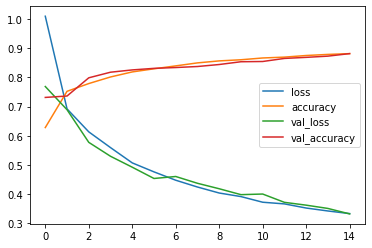

In [0]:
plt.figure(figsize=(12,8))
pd.DataFrame(cnn_hist.history).plot()
plt.show()

NOTE: The hyperparameters that I chose for the model are quite arbitrary. The results will perhaps be improved if we do some hyperparameter tuning. Additionally, it seems that our model is still improving, so we can also consider training it for a few more epochs. For the time being, we will not perform these steps due to some concerns in computational resources. 

## Using the Model

We first create a simple function that will allow us to display an image from the test set as well as its actual label and our model's prediction. We also add the option of choosing the color map to be used. 

In [0]:
def display_image(item_num,show_pred=True,cmap='binary'):  
  pixels = test_images[item_num].reshape(28,28)
  labels = test_labels[item_num]
  pred = np.argmax(cnn.predict(test_images[item_num].reshape(1,28,28,1)))
  plt.figure(figsize=(8,5))
  plt.imshow(pixels, cmap=cmap)
  plt.grid(False)
  plt.axis(False)
  if show_pred:
    plt.title('Actual: ' + class_names[labels] + ', ' + 'Predicted: ' + class_names[pred])
  else:
    plt.title(class_names[labels])
  plt.show() 

We can now use the function to display images from the test set. From the second example below, we can see that our model actually outputs a wrong prediction for the given image.

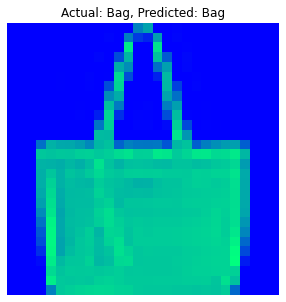

In [0]:
display_image(900,cmap='winter')

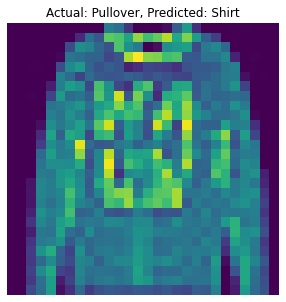

In [0]:
display_image(500,cmap='viridis')

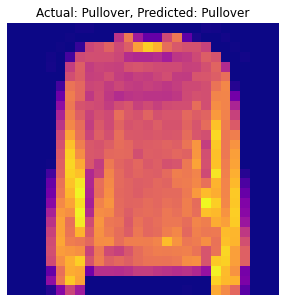

In [0]:
display_image(3453,cmap='plasma')

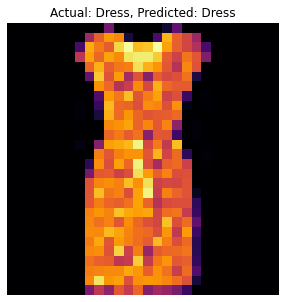

In [0]:
display_image(1346,cmap='inferno')

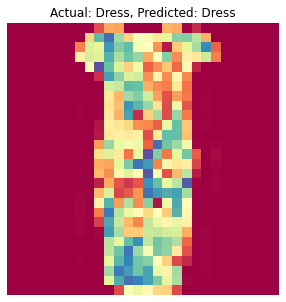

In [0]:
display_image(100,cmap='Spectral')

Finally, we preprocess the test set in the same way we preprocessed the training and validation datasets. We then evaluated our model's performance in the test set. Even with just 15 epochs, we were able to get an accuracy of about 88.17%! Like what I've mentioned above, hyperparameter tuning and more epochs would probably improve our model's performance.

In [0]:
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
test = tf.data.Dataset.from_tensor_slices((test_images,test_labels))
test = preprocess(test)

In [0]:
cnn.evaluate(test)

100/100 [==============================] - 11s 109ms/step - loss: 0.3419 - accuracy: 0.8817


[0.34185150265693665, 0.8816999793052673]

## Conclusion

This Colab notebook is just a way for me to demonstrate my beginner-level skills in machine learning. Thank you so much for taking the time to read it. Bye!